In [1]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import readwrite_gml
ak = readwrite_gml.read_gml('anna.gml',relabel=True)
#ak = nx.read_gml('anna.gml',relabel=True)
desc_dict = dict(ak.nodes(data=True))

In [5]:
# Sort the edge list by weight
all_edges = sorted(ak.edges(), key= lambda x: ak.get_edge_data(*x)['attr_dict']['value'], reverse=True)

Now for each edge we print the edge and its weight (normalized num scenes with that character pair).  The edge weights are determined by how many scenes the chatacter pair shared.

In [12]:
desc_dict['AL']['attr_dict']

{'id': 2,
 'desc': 'Alexey Alexandrovitch Karenin, minister of state',
 'label': 'AL'}

In [18]:
# 
from collections import Counter
all_char_ctr = Counter()
for (u,v) in all_edges:
    weight = ak.get_edge_data(u,v)['attr_dict']['value']
    for x in (u,v):
        all_char_ctr[x] += weight
    print ('%-4s %-4s %.3f %s => %s' % (u,v,weight,desc_dict[u]['attr_dict']['desc'],
                                        desc_dict[v]['attr_dict']['desc']))

AN   VR   27.200 Anna Arkadyevna Karenina, wife of AL => Count Alexey Kirillovitch Vronsky, young officer
KI   LE   22.530 Princess Ekaterina Alexandrovna Shtcherbatskaya (Kitty), wife of LE => Konstantin Dmitrievitch Levin, proprietor of Pokrovskoe
LE   ST   17.720 Konstantin Dmitrievitch Levin, proprietor of Pokrovskoe => Prince Stepan Arkadyevitch Oblonsky (Stiva), brother of AN
KO   LE   14.250 Sergei Ivanovitch Koznishev, half-brother of LE => Konstantin Dmitrievitch Levin, proprietor of Pokrovskoe
AL   AN   13.330 Alexey Alexandrovitch Karenin, minister of state => Anna Arkadyevna Karenina, wife of AL
KI   PS   11.070 Princess Ekaterina Alexandrovna Shtcherbatskaya (Kitty), wife of LE => Princess Shtcherbatskaya, mother of DO and KI
DO   LE   7.970 Princess Darya Alexandrovna Oblonskaya (Dolly), wife of ST => Konstantin Dmitrievitch Levin, proprietor of Pokrovskoe
AG   LE   7.580 Agafea Mihalovna, housekeeper of LE => Konstantin Dmitrievitch Levin, proprietor of Pokrovskoe
AL   S

We draw a graph of the strongest relationships in Anna Karenina.  Arbitrarily we pick the 30 most central edges,
and draw only characters occuring in those edges.  We associate edge weight with a color map; darker blue means 
weightier edge.  The centrality of Levin in many strong relationships emerges.

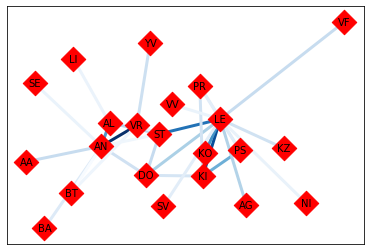

In [20]:
import math
selected_edges = all_edges[:30]

cmap = plt.cm.Blues
new_labels_ak = dict([(char,char) for pair in selected_edges for char in pair])
nodelist = new_labels_ak.keys()
sub_ak = ak.subgraph(nodelist)
# Alternative
#selected_edges = sub_ak.edges()
values = [ak.get_edge_data(u,v)['attr_dict']['value'] for (u,v) in selected_edges]
# normalize, increase the low values by taking sqrt of sqrt.
values = [pow(float(v)/values[0],0.25) for v in values]

#pos = nx.spring_layout(ak,scale=1.0) # The default scale is 1.0
#pos = nx.spring_layout(ak,scale=.75) # Try tweaking the scale and adjusting node positions.
#pos = nx.spring_layout(sub_ak,scale=2.0,weight='value') # Try increasing spring tension for chars with more scenes together
pos = nx.spring_layout(sub_ak,scale=2.0)
#pos = nx.spring_layout(ak) # Try increasing spring tension for chars with more scenes together
#nx.draw_networkx(ak,pos, with_labels=False,node_size=200,node_color="lightgray")  #Default node size=300

nx.draw_networkx_labels(sub_ak,pos,new_labels_ak,font_size=10,font_color='black')
#nx.draw_networkx_nodes(ak,pos,labels_ak,node_color='salmon',node_size=200)
nx.draw_networkx_nodes(sub_ak,pos,new_labels_ak,node_color='red',node_size=300,label_pos=1.0,node_shape='D',font_size=12)
#nx.draw_networkx_edges(ak,pos,edgelist=selected_edges,edge_color='black',edge_cmp = cmap)
nx.draw_networkx_edges(sub_ak,pos,edgelist=selected_edges,edge_color=values,edge_cmap = cmap,width=3)
#nx.draw_networkx_nodes(ak,pos,new_labels_ak,node_color='red',node_shape='p')

In [21]:
values

[1.0,
 0.9539993348899403,
 0.8984081921216919,
 0.8507686732777985,
 0.8366914120739051,
 0.7987202204753702,
 0.735736588682585,
 0.7265660073831784,
 0.7167849615224133,
 0.7018491170272204,
 0.6991753575083305,
 0.6991753575083305,
 0.6875965181003809,
 0.6815807236713948,
 0.6804166191264214,
 0.6771841447297298,
 0.6720955497854468,
 0.6547873417043675,
 0.6541315698835736,
 0.6474626912888447,
 0.6447364720452611,
 0.6423223321427448,
 0.635986323832681,
 0.6316547234232169,
 0.6287167148414677,
 0.6287167148414677,
 0.6257369309081041,
 0.6223329772884784,
 0.6192596340984008,
 0.6023217287921473]

In [23]:
?nx.spring_layout

We now look at degree and betweenness centrality.  These will give us different notions of character importance and
edge centrality.

In [27]:
all_chars_il = sorted(all_char_ctr.items(), key = lambda x:x[1], reverse=True)
for (char, ct) in all_chars_il:
    print ('%4s  %.3f  %s' % (char, ct, desc_dict[char]['attr_dict']['desc']))

top_chars_degree_centrality = all_chars_il[:10]
print
for (ch, ct) in top_chars_degree_centrality:
    print ('%4s %.3f %s' % (ch, ct, desc_dict[ch]['attr_dict']['desc']))


  LE  150.980  Konstantin Dmitrievitch Levin, proprietor of Pokrovskoe
  AN  102.980  Anna Arkadyevna Karenina, wife of AL
  KI  86.990  Princess Ekaterina Alexandrovna Shtcherbatskaya (Kitty), wife of LE
  VR  84.950  Count Alexey Kirillovitch Vronsky, young officer
  ST  80.990  Prince Stepan Arkadyevitch Oblonsky (Stiva), brother of AN
  DO  57.010  Princess Darya Alexandrovna Oblonskaya (Dolly), wife of ST
  AL  49.010  Alexey Alexandrovitch Karenin, minister of state
  KO  40.010  Sergei Ivanovitch Koznishev, half-brother of LE
  PS  31.010  Princess Shtcherbatskaya, mother of DO and KI
  PR  27.990  Prince Alexander Shtcherbatsky, father of DO and KI
  BT  17.000  Princess Betsy Tverskaya, cousin of VR
  AG  16.000  Agafea Mihalovna, housekeeper of LE
  VV  16.000  Vassenka Veslovsky, distant cousin of KI
  VK  16.000  Varvara Andreevna (Varenka), adopted daughter of MS
  SE  14.000  Sergey Alexeyevitch Karenin (Seryozha), son of AL and AN
  SV  13.970  Nikolay Ivanovitch Sviazhs

In [31]:

M_ak = nx.betweenness_centrality(ak)
il_ak = list(M_ak.items())
il_ak.sort(key=lambda x:x[1],reverse=True)
ak_top_chars_betweenness_dict = dict(il_ak[:10])
for (ch,score) in il_ak[:10]:
    print ('%5s  %.3f  %s' % (ch, score, desc_dict[ch]['attr_dict']['desc']))


   LE  0.369  Konstantin Dmitrievitch Levin, proprietor of Pokrovskoe
   VR  0.203  Count Alexey Kirillovitch Vronsky, young officer
   AN  0.198  Anna Arkadyevna Karenina, wife of AL
   ST  0.170  Prince Stepan Arkadyevitch Oblonsky (Stiva), brother of AN
   KI  0.117  Princess Ekaterina Alexandrovna Shtcherbatskaya (Kitty), wife of LE
   DO  0.069  Princess Darya Alexandrovna Oblonskaya (Dolly), wife of ST
   AL  0.056  Alexey Alexandrovitch Karenin, minister of state
   PR  0.044  Prince Alexander Shtcherbatsky, father of DO and KI
   YK  0.044  Yegorushka Korsunsky, handsome dancer
   KE  0.024  Prince Kedrov, member of VR's regiment


In [35]:
# Let's take a look at that scoundrel Vronsky, by retrieving all edges from/to VR
# and sorting them by weight

VR_edges = [e_pair for e_pair in ak.edges() if 'VR' in e_pair]
AN_edges = [e_pair for e_pair in ak.edges() if 'AN' in e_pair]
VR_edges.sort(key= lambda x: ak.get_edge_data(*x)['attr_dict']['value'], reverse=True)
AN_edges.sort(key= lambda x: ak.get_edge_data(*x)['attr_dict']['value'], reverse=True)

In [34]:
VR_edges

[('AN', 'VR'),
 ('VR', 'YV'),
 ('ST', 'VR'),
 ('BT', 'VR'),
 ('VA', 'VR'),
 ('AL', 'VR'),
 ('VR', 'XV'),
 ('PT', 'VR'),
 ('GO', 'VR'),
 ('KI', 'VR'),
 ('DO', 'VR'),
 ('CV', 'VR'),
 ('KO', 'VR'),
 ('CO', 'VR'),
 ('KU', 'VR'),
 ('SV', 'VR'),
 ('MI', 'VR'),
 ('SO', 'VR'),
 ('SP', 'VR'),
 ('PS', 'VR'),
 ('VP', 'VR'),
 ('KP', 'VR'),
 ('MH', 'VR'),
 ('TU', 'VR'),
 ('LE', 'VR'),
 ('VR', 'VV'),
 ('MY', 'VR'),
 ('CN', 'VR'),
 ('NY', 'VR'),
 ('PR', 'VR'),
 ('AA', 'VR'),
 ('GA', 'VR'),
 ('HA', 'VR'),
 ('SM', 'VR'),
 ('KA', 'VR'),
 ('KE', 'VR'),
 ('MB', 'VR'),
 ('PO', 'VR'),
 ('SH', 'VR'),
 ('VE', 'VR'),
 ('VR', 'YK'),
 ('VR', 'VY'),
 ('CD', 'VR'),
 ('KV', 'VR'),
 ('LI', 'VR'),
 ('TV', 'VR'),
 ('VI', 'VR')]